<a href="https://colab.research.google.com/github/JungseoChoi/CJSbioinformatics/blob/main/bioinformatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# anaconda 환경 불러오기

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 5.30 MiB/s, done.
./
./root/
./root/.profile
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.tmux.conf
./root/.bashrc.biolab
./root/.condarc
--2023-05-30 12:52:23--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   210MB/s    in 0.3s    

2023-05-30 12:52:23 (210 MB/

In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11 11:02 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11 11:03 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11 11:02 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 r

In [4]:
!conda install -y subread

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    ca-certificates-2023.5.7   |       h

In [5]:
%cd /content/drive/MyDrive/binfo1-datapack1/
!mkdir /content/drive/MyDrive/binfo1-project
%cd /content/drive/MyDrive/binfo1-project
!cp ../binfo1-datapack1/*.* .

/content/drive/.shortcut-targets-by-id/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh/binfo1-datapack1
mkdir: cannot create directory ‘/content/drive/MyDrive/binfo1-project’: File exists
/content/drive/MyDrive/binfo1-project


In [6]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [7]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


In [8]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


In [9]:
# 최소 10 이상의 read count를 가진 행들만 선택
filtered_data = cnts[(cnts['CLIP-35L33G.bam'] >= 10) &
                     (cnts['RNA-control.bam'] >= 10) &
                     (cnts['RPF-siLin28a.bam'] >= 10) &
                     (cnts['RNA-siLin28a.bam'] >= 10) &
                     (cnts['RPF-siLuc.bam'] >= 10) &
                     (cnts['RNA-siLuc.bam'] >= 10)]
filtered_data.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,33,44,3.562718,0.760459
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(filtered_data['clip_enrichment']),
           np.log2(filtered_data['rden_change']), s=3, alpha=0.2)

ax.set_ylabel("Ribosome density change\n on $\it{Lin28a}$ Knockdown (log$_{2}$)")
ax.set_xlabel("LIN28A CLIP enrichment (log$_{2}$)")

# NaN 값이 제외된 데이터로 상관 계수 계산
corr = np.corrcoef(np.log2(filtered_data['clip_enrichment']), np.log2(filtered_data['rden_change']))[0, 1]
ax.text(0.05, 0.95, f"R = {corr:.2f}", transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

plt.show()

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.tail()

In [ ]:
cnts['gene_id'] = cnts.index.to_series().str.split('.').str[0]
filtered_data = cnts
filtered_data.head()

In [ ]:
merged = pd.merge(filtered_data, mouselocal, on='gene_id')
merged[['gene_id', 'type', 'Gene names', 'clip_enrichment', 'rden_change']]

In [ ]:
#merged된 파일을 output하기
merged.to_csv('output.txt', sep='\t', index=False)

In [ ]:
# 'gene_id' 열만 선택하여 새로운 데이터프레임 생성
subset = merged[['gene_id']] 
subset.to_csv('output_subset3.txt', sep='\t', index=False)

In [ ]:
# 가져온 tsv파일을 이용해 파일 읽기
GO_term = pd.read_csv('GO_term.tsv', sep='\t', index_col=0)
GO_term

In [ ]:
# From column을 gene_id을 추가
GO_term['gene_id'] = GO_term.index.to_series()
GO_term

In [54]:
merged_GO = pd.merge(merged, GO_term, on='gene_id')
merged_GO.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,...,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type,Entry,Gene Ontology (GO),Entry Name,Gene Names
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,...,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm,P97823,cell surface [GO:0009986]; cytoplasm [GO:00057...,LYPA1_MOUSE,Lypla1 Apt1 Pla1a
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,...,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm,D3YUG4,hydrolase activity [GO:0016787],D3YUG4_MOUSE,Lypla1
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,...,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm,D3Z111,hydrolase activity [GO:0016787],D3Z111_MOUSE,Lypla1
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,...,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm,D3Z269,hydrolase activity [GO:0016787],D3Z269_MOUSE,Lypla1
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,574,1219,1236,...,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm,J3QP56,hydrolase activity [GO:0016787],J3QP56_MOUSE,Lypla1


In [59]:
#merged_GO에서 원하는 column만 보이게.
subsets_GO = merged_GO[['gene_id', 'type', 'Gene names', 'clip_enrichment', 'rden_change', 'Gene Ontology (GO)']].set_index('gene_id')
subsets_GO.tail()

,type,Gene names,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,,,
ENSMUSG00000064345,integral membrane,Mtnd2 mt-Nd2 Nd2,0.214685,1.375759,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064351,integral membrane,Mtco1 COI mt-Co1,0.032035,0.954724,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064363,integral membrane,Mtnd4 mt-Nd4 Nd4,0.173488,1.107123,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064367,integral membrane,Mtnd5 mt-Nd5 Nd5,0.693997,1.263275,mitochondrial inner membrane [GO:0005743]; mit...
ENSMUSG00000064368,integral membrane,Mtnd6 mt-Nd6 Nd6,0.843117,1.263780,mitochondrial inner membrane [GO:0005743]; mit...


In [60]:
# Gene ontology (GO)에서 [GO:0009986]을 없애기
import re
pattern = re.compile(r'\s*\[GO:\d+\]\s*' )
subsets_GO['Gene Ontology (GO)'] = subsets_GO['Gene Ontology (GO)'].str.replace(pattern, '')
subsets_GO


,type,Gene names,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,,,
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,cell surface; cytoplasm; cytosol; endoplasmic ...
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,hydrolase activity
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,hydrolase activity
...,...,...,...,...,...
ENSMUSG00000064345,integral membrane,Mtnd2 mt-Nd2 Nd2,0.214685,1.375759,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064351,integral membrane,Mtco1 COI mt-Co1,0.032035,0.954724,mitochondrial inner membrane; mitochondrial re...
ENSMUSG00000064363,integral membrane,Mtnd4 mt-Nd4 Nd4,0.173488,1.107123,mitochondrial inner membrane; mitochondrial re...


In [76]:
# Gene ontology (GO)에서 ';'을 기준으로 새로운 행으로 만들기
subsets_GO = subsets_GO.assign(**{'Gene Ontology (GO)': subsets_GO['Gene Ontology (GO)'].str.split(';')}).explode('Gene Ontology (GO)')
subsets_GO[:15]

,type,Gene names,clip_enrichment,rden_change,Gene Ontology (GO)
gene_id,,,,,
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,cell surface
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,cytoplasm
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,cytosol
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,endoplasmic reticulum
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,mitochondrion
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,nuclear membrane
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,plasma membrane
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,carboxylic ester hydrolase activity
ENSMUSG00000025903,cytoplasm,Lypla1 Apt1 Pla1a,3.562718,0.760459,lipase activity


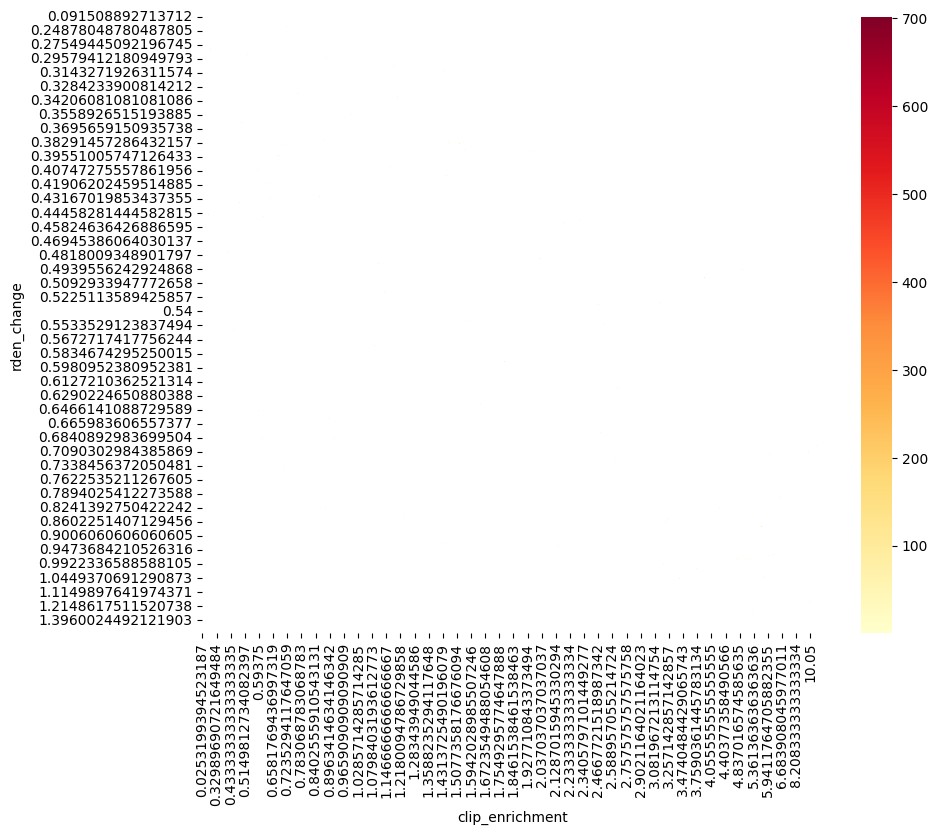

In [80]:
import seaborn as sns

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Heat-dot map 그리기
heatmap_data = subsets_GO.pivot_table(index='rden_change', columns='clip_enrichment', values='Gene Ontology (GO)', aggfunc=len)
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax)

# x축과 y축 레이블 설정
ax.set_xlabel('clip_enrichment')
ax.set_ylabel('rden_change')

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: ignored

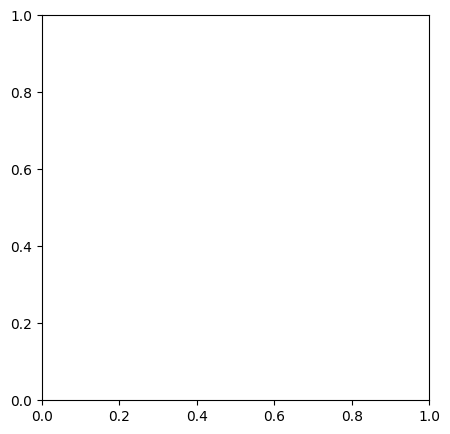

In [81]:
# type에 따라 다른 색깔로 점 표시
type_colors = {'nucleus': 'blue', 'integral membrane': 'magenta', 'cytoplasm': 'green'}
colors = [type_colors[t] for t in merged['type']]

# merged에서 100개씩 무작위로 추출
sample_data = merged.groupby('type').apply(lambda x: x.sample(n=200, random_state=42))

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(sample_data['clip_enrichment']),
           np.log2(sample_data['rden_change']), s=3, c=sample_data['Gene ontology(GO)'].map(type_colors), alpha=.5)

ax.set_ylabel("Ribosome density change\n on $\it{Lin28a}$ Knockdown (log$_{2}$)")
ax.set_xlabel("LIN28A CLIP enrichment (log$_{2}$)")


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5) for color in type_colors.values()]
labels = list(type_colors.keys())
plt.legend(handles, labels, loc='upper left')

plt.show()